In [1]:
import torch
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms
from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

# Modelo pre-entrenado
---

In [2]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to C:\Users\s.maje/.cache\torch\checkpoints\inception_v3_google-1a9a5a14.pth
100.0%


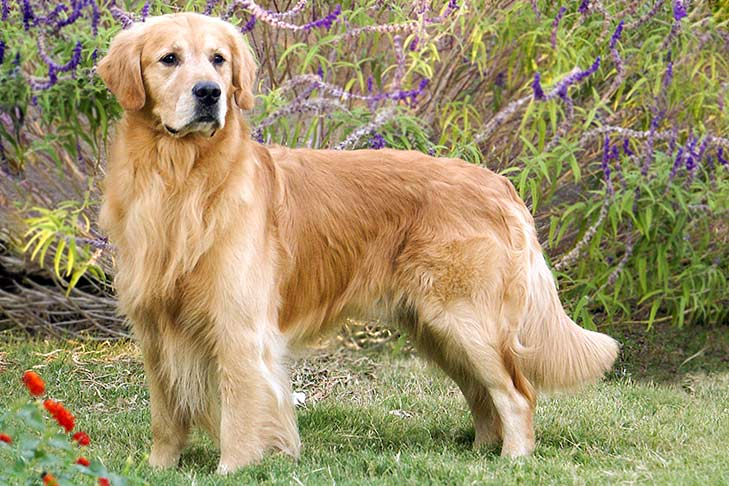

In [3]:
url = 'https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12130118/Golden-Retriever-Standing1.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [14]:
preprocess = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


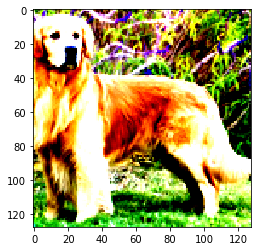

In [15]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1, 2, 0))

In [6]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [16]:
out = inception(batch)
# los números representan la imagen convertida
out

tensor([[ 7.0735e+00,  8.7658e+00,  3.1758e-01,  2.5534e-01, -3.6912e+00,
         -1.0932e+00,  4.8778e+00,  3.8252e+00,  6.4190e+00, -3.0395e+00,
         -2.1436e+00,  7.3304e-01,  2.2458e+00,  2.1209e+00, -3.9095e+00,
         -2.6876e+00,  5.9397e-01,  1.7027e+00, -3.1307e+00, -1.1164e+00,
         -6.5498e+00, -3.9489e+00, -8.3764e-01,  3.1360e+00, -6.5535e+00,
         -1.6280e+00, -5.4828e+00, -4.1712e+00,  1.4366e+00, -1.0227e+00,
          4.0625e-01,  1.5112e+00, -4.0329e-01, -2.8911e+00,  5.7980e-02,
         -2.2015e+00,  1.3486e+00,  4.1697e+00,  2.6261e+00, -1.8308e+00,
         -2.0626e+00, -3.9914e+00, -5.2885e-01,  2.7246e+00, -4.7543e+00,
         -4.1605e+00, -5.2556e+00, -6.5967e+00,  9.0873e+00,  1.6543e+00,
         -3.0827e+00,  3.0716e+00, -8.7690e+00, -6.0682e+00, -1.0937e+01,
          2.5083e+00, -4.5306e+00, -2.7847e+00, -5.3035e+00, -2.8947e+00,
         -5.0942e+00,  4.1545e-01,  2.2057e+00, -3.3519e+00,  1.9107e-01,
         -5.8080e+00, -6.6721e+00,  1.

In [10]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [17]:
out

tensor([[ 7.0735e+00,  8.7658e+00,  3.1758e-01,  2.5534e-01, -3.6912e+00,
         -1.0932e+00,  4.8778e+00,  3.8252e+00,  6.4190e+00, -3.0395e+00,
         -2.1436e+00,  7.3304e-01,  2.2458e+00,  2.1209e+00, -3.9095e+00,
         -2.6876e+00,  5.9397e-01,  1.7027e+00, -3.1307e+00, -1.1164e+00,
         -6.5498e+00, -3.9489e+00, -8.3764e-01,  3.1360e+00, -6.5535e+00,
         -1.6280e+00, -5.4828e+00, -4.1712e+00,  1.4366e+00, -1.0227e+00,
          4.0625e-01,  1.5112e+00, -4.0329e-01, -2.8911e+00,  5.7980e-02,
         -2.2015e+00,  1.3486e+00,  4.1697e+00,  2.6261e+00, -1.8308e+00,
         -2.0626e+00, -3.9914e+00, -5.2885e-01,  2.7246e+00, -4.7543e+00,
         -4.1605e+00, -5.2556e+00, -6.5967e+00,  9.0873e+00,  1.6543e+00,
         -3.0827e+00,  3.0716e+00, -8.7690e+00, -6.0682e+00, -1.0937e+01,
          2.5083e+00, -4.5306e+00, -2.7847e+00, -5.3035e+00, -2.8947e+00,
         -5.0942e+00,  4.1545e-01,  2.2057e+00, -3.3519e+00,  1.9107e-01,
         -5.8080e+00, -6.6721e+00,  1.

In [18]:
_, index = torch.max(out, 1)

In [23]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()
# imprime la(s) raza(s) del perro que se está evaluando con una respectiva probabilidad

('golden retriever', 96.44806671142578)

In [25]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
    print(labels[i], percentage[i].item())

golden retriever 96.44806671142578
Irish setter, red setter 2.9600939750671387
Saluki, gazelle hound 0.5803787708282471
Brittany spaniel 0.011222301051020622
cocker spaniel, English cocker spaniel, cocker 0.0001773458789102733


# Trabajando con un dataset
---

In [26]:
data_path = 'data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

100.0%

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [27]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [28]:
len(dataset)

50000

In [35]:
img, label = dataset[50]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x1C554E42208>, 9, 'truck')

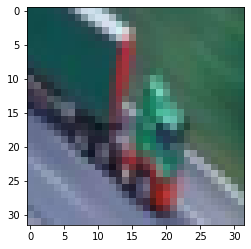

In [36]:
plt.imshow(img)

In [37]:
tensor_transform = transforms.ToTensor()
img_tensor = tensor_transform(img)
img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x1C554E42208>,
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902, 0.2902, 0.2902,  ..., 0.

In [40]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [41]:
img, label = dataset[50]
img

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

In [42]:
img.min(), img.max()

(tensor(0.0314), tensor(0.9529))

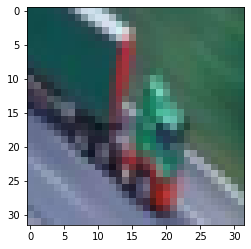

In [43]:
plt.imshow(img.permute(1, 2, 0))

In [44]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [45]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [46]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [47]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [53]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.4915, 0.4823, 0.4468),
        (0.2470, 0.2435, 0.2616)
    )
])

In [54]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

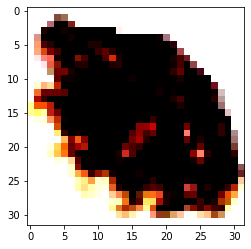

In [55]:
img_transformed,label = dataset[125]
plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]